# SQL practice SQLite3 in Python

!pip install kaggle
 go on Kaggle to create a authorization token 
 
 https://github.com/Kaggle/kaggle-api/blob/main/docs/README.md

### Download Data from Kaggle

In [1]:
!kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          24285        484  0.9411765        
bhavikjikadara/student-study-performance                    Student Study Performance                        9KB  2024-03-07 06:14:09          12013        154  1.0              
sukhmandeepsinghbrar/housing-price-dataset                  Housing Price Dataset                          780KB  2024-04-04 19:45:43           1445         28  1.0              
muhammadkashif724/netflix-tv-shows-2021                     Netflix TV Shows 2021                        

usage: kaggle datasets list [-h] [--sort-by SORT_BY] [--min-size MIN_SIZE] [--max-size MAX_SIZE] [--file-type FILE_TYPE] [--license LICENSE_NAME] [--tags TAG_IDS] [-s SEARCH] [-m] [--user USER] [-p PAGE] [-v] 

Note:
1. sort by valid options are ['hottest', 'votes', 'updated', 'active', 'published']
2. MIN_SIZE and MAX_SIZE are in bytes
3. file type valid options are ['all', 'csv', 'sqlite', 'json', 'bigQuery']

from https://github.com/Kaggle/kaggle-api/blob/main/docs/README.md

In [2]:
!kaggle datasets list -p 2

ref                                                       title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
willianoliveiragibin/time-the-internet                    time the Internet                           43KB  2024-03-28 18:36:19            860         28  1.0              
divu2001/customer-churn-rate                              Customer Churn Rate                        262KB  2024-03-30 11:15:02            397         23  1.0              
bhavikjikadara/mental-health-dataset                      Mental Health Dataset                        2MB  2024-03-18 06:05:16           3854         58  1.0              
m1relly/heart-attack-prediction                           Heart Attack Prediction                    519KB  2024-04-01 18:17:52        

In [3]:
!kaggle datasets list -s book

ref                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arashnic/book-recommendation-dataset                   Book Recommendation Dataset                          24MB  2024-02-09 11:14:20          57473        319  1.0              
jealousleopard/goodreadsbooks                          Goodreads-books                                     622KB  2020-03-09 09:18:31          65013       1796  1.0              
jessemostipak/hotel-booking-demand                     Hotel booking demand                                  1MB  2020-02-13 01:27:20         136017       2370  1.0              
ruchi798/bookcrossing-dataset                          Book-Crossing: User review ratings                

In [4]:
!kaggle datasets list -s "data scientist salary"

ref                                                           title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
nikhilbhathi/data-scientist-salary-us-glassdoor               Data scientist salary                              1023KB  2021-12-29 15:28:13          15182        210  1.0              
henryshan/2023-data-scientists-salary                         2023 Data Scientists Salary                          25KB  2023-12-14 10:14:34           5181         91  1.0              
omkargowda/data-scientist-salary                              Data Scientist Salary                                88KB  2022-07-09 11:25:59           1809         70  1.0              
jaiganeshnagidi/data-scientist-salary                         Data Sci

In [5]:
!kaggle datasets download henryshan/2023-data-scientists-salary

Dataset URL: https://www.kaggle.com/datasets/henryshan/2023-data-scientists-salary
License(s): Apache 2.0
2023-data-scientists-salary.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!kaggle datasets metadata henryshan/2023-data-scientists-salary

Downloaded metadata to C:\Users\hdang\Documents\Development\Kaggle\Knowledge\new_proj\dataset-metadata.json


In [7]:
import json

# Specify the path to your JSON file
file_path = 'dataset-metadata.json'

# Open the file in read mode
with open(file_path, 'r') as file:
    # Load the JSON data into a Python dictionary
    data = json.load(file)

# Print Metadata
for key, value in data.items():
    print(f'{key}:{value}')

id:henryshan/2023-data-scientists-salary
id_no:4164244
datasetSlugNullable:2023-data-scientists-salary
ownerUserNullable:henryshan
usabilityRatingNullable:1.0
titleNullable:2023 Data Scientists Salary
subtitleNullable:Salaries of Different Data Science Fields in the Data Science Domain
descriptionNullable:## Summary
The aim of this study is to investigate the factors influencing the salaries of Data Scientists. To achieve this, a dataset containing various relevant variables was utilized. This report describes the exploratory analysis conducted to understand the relationship between these factors and Data Scientists' salaries.

## Introduction
Data science is a rapidly growing field, and Data Scientists play a crucial role in analyzing and interpreting large volumes of data. As this profession becomes increasingly in demand, it is important to understand the factors that may influence Data Scientists' salaries. This analysis focuses on investigating these factors and their impact on sa

In [8]:
# Unzip the data
import zipfile
with zipfile.ZipFile('2023-data-scientists-salary.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [9]:
# Check the unzip operation and get the file name
import os
os.listdir()

['.ipynb_checkpoints',
 '2023-data-scientists-salary.zip',
 'dataset-metadata.json',
 'ds_salaries.csv',
 'ds_salaries.db',
 'Kaggle-Data-SQLite-Demo.ipynb']

In [10]:
# pre-lim data reading with pandas
import pandas as pd

df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [11]:
df.shape

(3755, 11)

In [12]:
# Create a little database for this data with SQLite3
import sqlite3
import csv

# path to csv file
file = 'ds_salaries.csv'

# path to db
db = 'ds_salaries.db'

# Connect to the SQLite database
conn = sqlite3.connect(db)
cursor = conn.cursor()

# Create a table to store the data
cursor.execute('''CREATE TABLE IF NOT EXISTS sal (
                    year INTEGER,
                    exp_level VARCHAR(2),
                    employment_type VARCHAR(2),
                    job_title VARCHAR(256),
                    salary INTEGER,
                    salary_currency VARCHAR(10),
                    salary_in_usd INTEGER, 
                    employee_residence VARCHAR(10),
                    remote_ratio INTEGER,
                    company_location VARCHAR(10),
                    company_size VARCHAR(1)
                  )''')

# Read the CSV file and insert data into the database
with open(file, 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip the header row
    for row in csv_reader:
        cursor.execute('''INSERT INTO sal (year,
                                           exp_level, 
                                           employment_type,
                                           job_title,
                                           salary,
                                           salary_currency,
                                           salary_in_usd,
                                           employee_residence,
                                           remote_ratio,
                                           company_location,
                                           company_size) VALUES (?, ?, ?, ?, ?,?,?,?,?,?,?)''', row)
# Commit the changes and close the connection
conn.commit()
conn.close()

In [13]:
# Confirm data has been loaded by reading from the database
conn = sqlite3.connect(db)
cursor = conn.cursor()
cursor.execute('SELECT * FROM sal LIMIT 5')
rows = cursor.fetchall()
for row in rows:
    print(row)

conn.close()

(2023, 'SE', 'FT', 'Principal Data Scientist', 80000, 'EUR', 85847, 'ES', 100, 'ES', 'L')
(2023, 'MI', 'CT', 'ML Engineer', 30000, 'USD', 30000, 'US', 100, 'US', 'S')
(2023, 'MI', 'CT', 'ML Engineer', 25500, 'USD', 25500, 'US', 100, 'US', 'S')
(2023, 'SE', 'FT', 'Data Scientist', 175000, 'USD', 175000, 'CA', 100, 'CA', 'M')
(2023, 'SE', 'FT', 'Data Scientist', 120000, 'USD', 120000, 'CA', 100, 'CA', 'M')


In [14]:
#What is the average salary
conn = sqlite3.connect(db)
query = '''
            SELECT employment_type, round(avg(salary_in_usd),2) avg_sal
            FROM sal 
            WHERE company_location = 'US'
            GROUP BY 1;
'''
df_result = pd.read_sql_query(query, conn)
conn.close()
df_result

,employment_type,avg_sal
0,CT,137062.50
1,FL,57500.00
2,FT,152214.25
3,PT,36823.33


<AxesSubplot:xlabel='employment_type'>

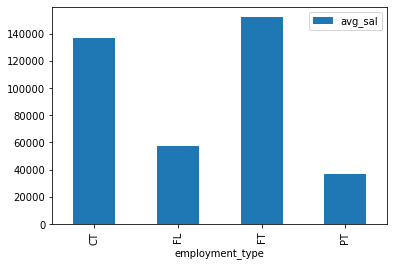

In [18]:
df_result.plot(x = 'employment_type', kind = 'bar')

# Machine Learning

## EDA

### 1-D